In [56]:
# IMPORTANT: If you have no permission to read the files, write the following command

# sudo chown <user>:<group>           (<group> is usually 'staff', without '')

# and drag all files (or the containing folder) into the terminal, then execute the command

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# setup (adapt if necessary)

path_log = '/Users/max/Desktop/log/'
path_acc = '/Users/max/Desktop/accuracies/'

n_img = 9834
n_epochsA = 20
n_epochsB = 6
n_itersA = n_epochsA*n_img
n_itersB = n_epochsB*n_img

In [8]:
# grid

lambda_s = ['1', '5e-1', '1e-1', '5e-2', '1e-2', '5e-3', '1e-3', '5e-4']
lambda_n = np.array(lambda_s).astype(float)

metric_s = ['2', 'cos']

lr_s = ['1e-4', '1e-5', '1e-6']
lr_n = np.array(lr_s).astype(float)*2

epoch_n = np.arange(n_epochsB)+1
epoch_s = list(epoch_n.astype(str))

In [22]:
# load accuracy values & write adversarial loss values into array

ACC = -np.ones(shape=(len(lambda_s), len(metric_s), len(lr_s), len(epoch_s)))
adv_loss = -np.ones(shape=(len(lambda_s), len(metric_s), len(lr_s), len(epoch_s)))

for i, la in enumerate(lambda_s):
    for j, me in enumerate(metric_s):
        for k, lr in enumerate(lr_s):
            
            hyper_name = la+'_'+me+'_'+lr
            file = open(path_acc+hyper_name+'_accuracies.txt', 'r')
            ACC[i,j,k,:] = file.read().split('\n')[:n_epochsB]
            file.close()
            
            with open(os.path.join(path_log, hyper_name+'.txt'), 'r') as f:
        
                lines = f.readlines()

                for line in lines:

                    if 'work_dir' in line:
                        stem = '_'.join(line.split('/')[5].split('_')[:3])

                    elif '][INFO] Iter' in line:

                        for n_ep in range(n_epochsB):

                            str_ep = str(round((n_ep+1)*n_img/10)*10)

                            if (str_ep+'/'+str(n_itersA) in line) or (str_ep+'/'+str(n_itersB) in line):
                                idx_loss = line.find('g_loss: ')
                                adv_loss[i,j,k,n_ep] = float(line[idx_loss+8:idx_loss+13])

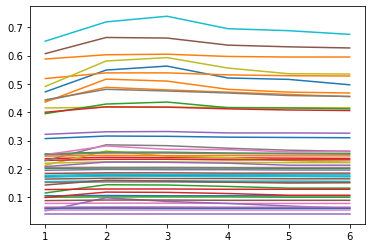

In [7]:
# adv_loss seems not to help to detect nonsense images...
for i, la in enumerate(lambda_s):
    for j, me in enumerate(metric_s):
        for k, lr in enumerate(lr_s):
            plt.plot(np.arange(n_epochsB)+1, adv_loss[i,j,k,:])
            
plt.show()

In [46]:
sel_idx_la = 0
sel_idx_me = 0
sel_idx_lr = 2
sel_idx_ep = 1

ACC_sel = ACC[sel_idx_la:,sel_idx_me:,sel_idx_lr:,:sel_idx_ep]

lambda_s_sel = lambda_s[sel_idx_la:]
metric_s_sel = metric_s[sel_idx_me:]
lr_s_sel = lr_s[sel_idx_lr:]
epoch_s_sel = epoch_s[:sel_idx_ep]

lambda_n_sel = lambda_n[sel_idx_la:]
lr_n_sel = lr_n[sel_idx_lr:]
epoch_n_sel = epoch_n[:sel_idx_ep]

In [24]:
print(ACC.shape)
print(ACC_sel.shape)

(8, 2, 3, 6)
(8, 2, 2, 2)


In [47]:
# find optimum

opt_idx = np.unravel_index(np.argmin(ACC_sel, axis=None), ACC_sel.shape)
opt_acc = ACC_sel[opt_idx]

print('opt ac =', str(opt_acc))

print('opt la =', lambda_s_sel[opt_idx[0]])
print('opt me =', metric_s_sel[opt_idx[1]])
print('opt lr =', lr_s_sel[opt_idx[2]])
print('opt ep =', epoch_s_sel[opt_idx[3]])

opt ac = 0.7996
opt la = 5e-4
opt me = 2
opt lr = 1e-6
opt ep = 1


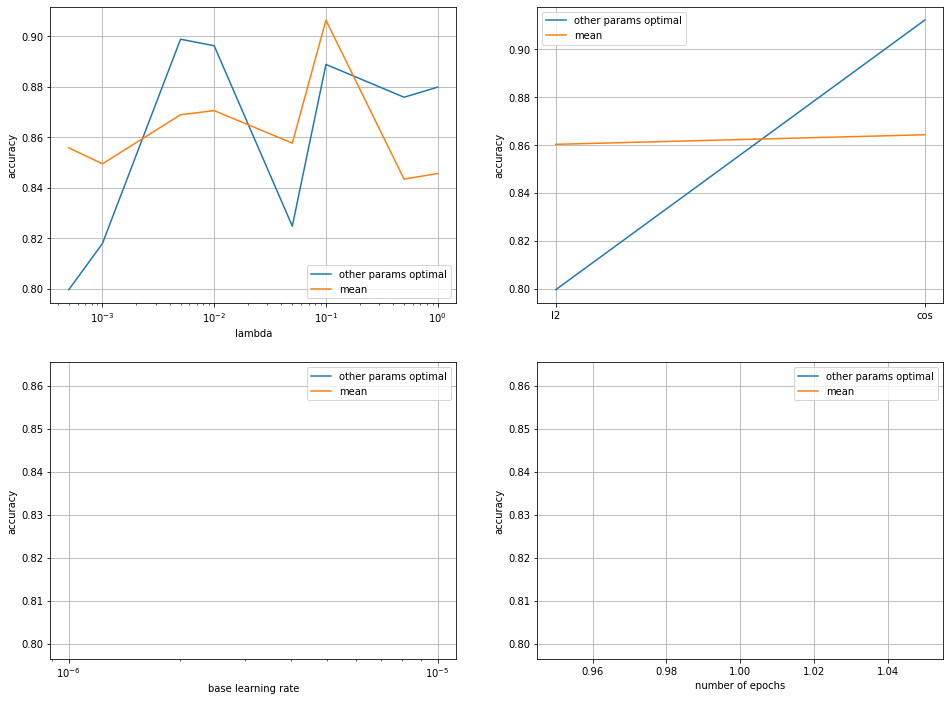

In [48]:
# plots

f = plt.figure(figsize=(16,12))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

# ac over la
ax1.semilogx(lambda_n_sel, ACC_sel[:,opt_idx[1],opt_idx[2],opt_idx[3]])
ax1.semilogx(lambda_n_sel, np.mean(ACC_sel, axis=(1,2,3)))
ax1.set_xlabel('lambda')
ax1.set_ylabel('accuracy')
ax1.legend(['other params optimal','mean'])
ax1.grid()

# ac over me
ax2.plot([0, 1], ACC_sel[opt_idx[0],:,opt_idx[2],opt_idx[3]])
ax2.plot([0, 1], np.mean(ACC_sel, axis=(0,2,3)))
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['l2', 'cos'])
ax2.set_ylabel('accuracy')
ax2.legend(['other params optimal','mean'])
ax2.grid()

# ac over lr
ax3.semilogx(lr_n_sel, ACC_sel[opt_idx[0],opt_idx[1],:,opt_idx[3]])
ax3.semilogx(lr_n_sel, np.mean(ACC_sel, axis=(0,1,3)))
ax3.set_xlabel('base learning rate')
ax3.set_ylabel('accuracy')
ax3.legend(['other params optimal','mean'])
ax3.grid()

# ac over ep
ax4.plot(epoch_n_sel, ACC_sel[opt_idx[0],opt_idx[1],opt_idx[2],:])
ax4.plot(epoch_n_sel, np.mean(ACC_sel, axis=(0,1,2)))
ax4.set_xlabel('number of epochs')
ax4.set_ylabel('accuracy')
ax4.legend(['other params optimal','mean'])
ax4.grid()